## Data Ingestion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('YouthRisk.csv')
data.head()

,Unnamed: 0,ride.alc.driver,female,grade,age4,smoke,DriverLicense
0,1,1,1.0,10.0,15.0,1.0,0.0
1,2,1,1.0,10.0,18.0,1.0,1.0
2,3,1,NaN,NaN,NaN,NaN,NaN
3,4,0,0.0,11.0,17.0,0.0,1.0
4,5,0,0.0,11.0,17.0,0.0,1.0


#### Data Description:

1. ride.alc.driver->have rode with drunken driver in past 30 days.
2. female->gender.
3. grade->which standard[9,10,11,12]
4. age4->age [14,15,16,17,18]
5. smoke->Smoke or not
6. DriverLicense->Have license or not

In [3]:
data.shape

(13387, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13387 entries, 0 to 13386
Data columns (total 7 columns):
Unnamed: 0         13387 non-null int64
ride.alc.driver    13387 non-null int64
female             12632 non-null float64
grade              13320 non-null float64
age4               13333 non-null float64
smoke              12999 non-null float64
DriverLicense      13333 non-null float64
dtypes: float64(5), int64(2)
memory usage: 732.2 KB


As the data set given for classification problem and most of the columns are in categorical.
Categorical Variables:
1. .alc.driver
2. female
3. grade
4. age4
5. smoke
6. DriverLicense

In [5]:
data.describe()

,Unnamed: 0,ride.alc.driver,female,grade,age4,smoke,DriverLicense
count,13387.000000,13387.000000,12632.000000,13320.000000,13333.000000,12999.000000,13333.000000
mean,6694.000000,0.312019,0.527707,10.520571,16.157279,0.534349,0.676892
std,3864.638362,0.463335,0.499251,1.117887,1.211605,0.498838,0.467681
min,1.000000,0.000000,0.000000,9.000000,14.000000,0.000000,0.000000
25%,3347.500000,0.000000,0.000000,10.000000,15.000000,0.000000,0.000000
50%,6694.000000,0.000000,1.000000,11.000000,16.000000,1.000000,1.000000
75%,10040.500000,1.000000,1.000000,12.000000,17.000000,1.000000,1.000000
max,13387.000000,1.000000,1.000000,12.000000,18.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

Unnamed: 0           0
ride.alc.driver      0
female             755
grade               67
age4                54
smoke              388
DriverLicense       54
dtype: int64

There are so many missing values. Let us treat them.

#### Missing values treatment

In [7]:
#The columns unnamed: 0 is not usable so delete the column
del(data['Unnamed: 0'])

In [8]:
data['female'].value_counts()

1.0    6666
0.0    5966
Name: female, dtype: int64

In [9]:
data['grade'].value_counts()

12.0    3411
11.0    3361
10.0    3299
9.0     3249
Name: grade, dtype: int64

In [10]:
data['age4'].value_counts()

16.0    3470
17.0    3457
15.0    3060
18.0    2098
14.0    1248
Name: age4, dtype: int64

In [11]:
data.shape

(13387, 6)

In [12]:
data['age4'].dropna(inplace=True)

In [13]:
data['age4'].isnull().sum()

0

In [22]:
for i in range(13387):
    if data['age4'][i] == 14:
        data['grade'][i] = data['grade'].fillna(value=9.0,axis=0,inplace=True)
    elif data['age4'][i] == 15.0:
        data['grade'][i] = data['grade'].fillna(value=10.0,axis=0,inplace=True)
    elif data['age4'][i] == 16.0:
        data['grade'][i] = data['grade'].fillna(value=11.0,axis=0,inplace=True)
    elif data['age4'][i] == 17.0:
        data['grade'][i] = data['grade'].fillna(value=12.0,axis=0,inplace=True)
    else:
        data['grade'].dropna(inplace=True)

In [23]:
data['grade'].isnull().sum()

1

In [24]:
data['female'] = data['female'].fillna(method='pad')

In [25]:
data['smoke'] = data['smoke'].fillna(method='pad')

In [26]:
for i in range(13387):
    if data['age4'][i] == 18:
        data['DriverLicense'][i] = data['DriverLicense'].fillna(value=1,axis=0,inplace=True)

In [27]:
data.isnull().sum()

ride.alc.driver     0
female              0
grade               1
age4               54
smoke               0
DriverLicense       1
dtype: int64

In [28]:
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

ride.alc.driver    0
female             0
grade              0
age4               0
smoke              0
DriverLicense      0
dtype: int64

1. As we know above 18 year are eligible to get the driving license i have filled 1 which means having driving lincense with respect to age.
2. Even the grade depends on age like 10th grade 15 years,12th grade 17 years and so on. So i have filled the nan values in grade column with respect to age.

## Split Data Set

In [30]:
X = data.drop(columns=['ride.alc.driver'])
y = data['ride.alc.driver']

In [31]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(9331, 5)
(4000, 5)
(9331,)
(4000,)


In [32]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print('Training score =', logreg_model.score(Xtrain, ytrain))
print('Test score =', logreg_model.score(Xtest, ytest))

Training score = 0.6887793376915657
Test score = 0.685


In [34]:
m1_train = 0.688
m1_test = 0.685

## Base Model

In [86]:
import statsmodels

In [ ]:
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary2())

In [35]:
logreg_model = LogisticRegression()
logreg_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logreg_model.score(X, y)

0.688320456079814

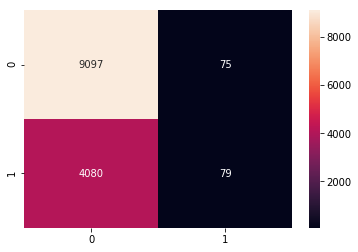

In [37]:
from sklearn.metrics import confusion_matrix
ypred = logreg_model.predict(X)
cm = confusion_matrix(y, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [38]:
tn = cm[0,0]
tp = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [39]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.688320456079814
Precision = 0.512987012987013
Recall = 0.01899495070930512
F1 Score = 0.03663343380477626


ROC AUC = 0.6713657097659781


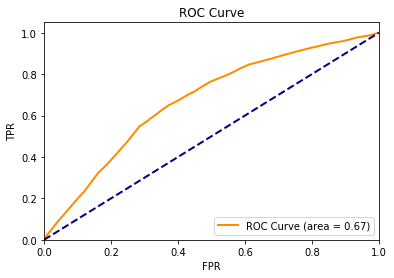

In [40]:
from sklearn.metrics import roc_curve,roc_auc_score
yprob = logreg_model.predict_proba(X)
fpr,tpr,threshold = roc_curve(y,yprob[:,1])
roc_auc = roc_auc_score(y,yprob[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# EDA

### a. Check for Outlier using Box plot and apply the formula to check how many of these data has outliers 

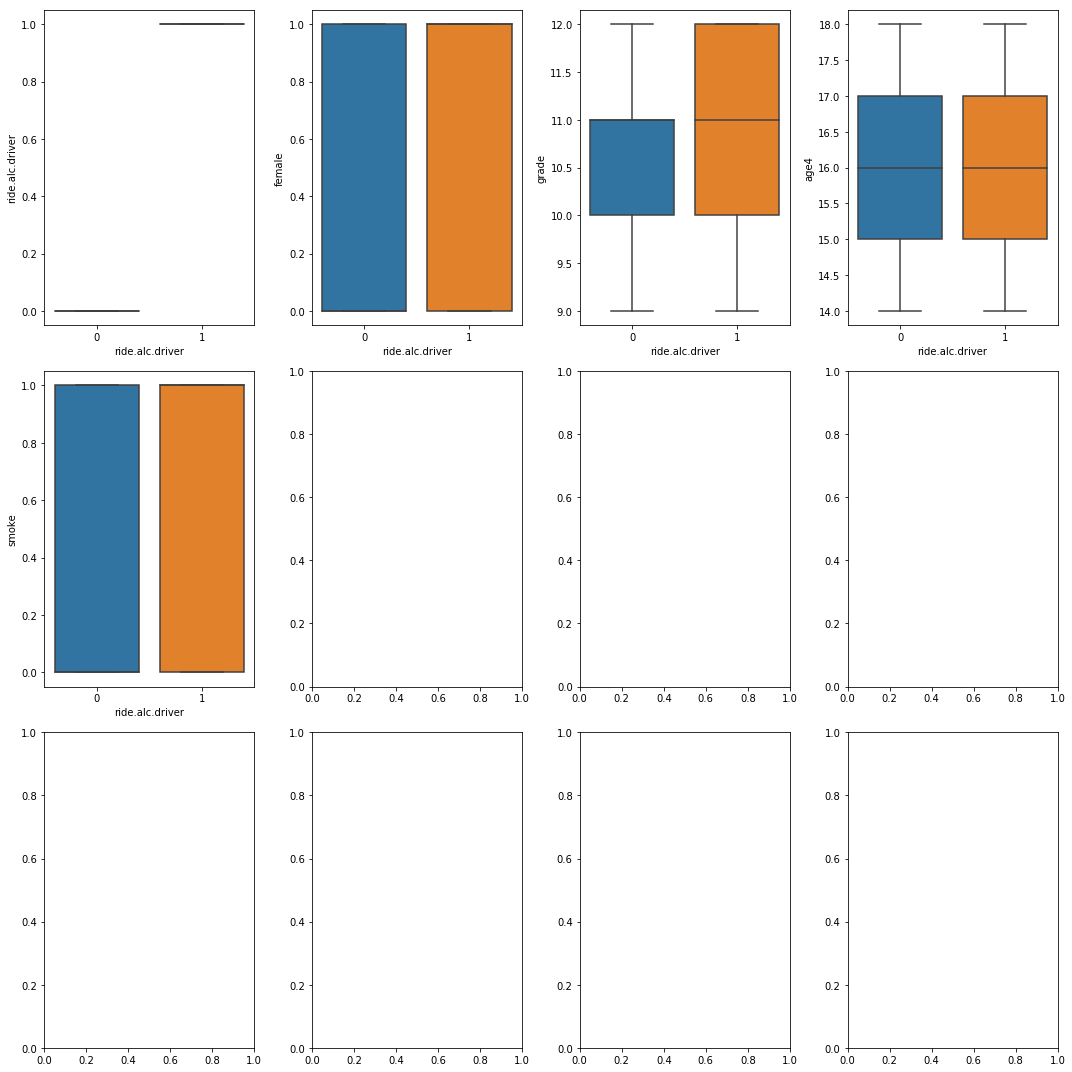

In [41]:
fig, axes = plt.subplots(3,4,figsize=(15,15))
axes = axes.flatten()

for i in range(0,len(data.columns)-1):
    sns.boxplot(x='ride.alc.driver',y=data.iloc[:,i],data=data,orient='v',ax=axes[i])
    
plt.tight_layout()
plt.show()

In [42]:
data.columns

Index(['ride.alc.driver', 'female', 'grade', 'age4', 'smoke', 'DriverLicense'], dtype='object')

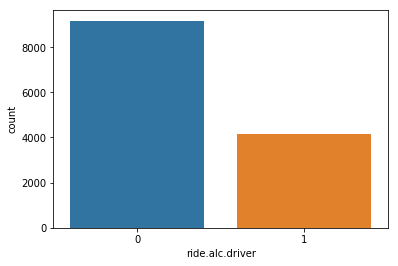

In [43]:
sns.countplot(data['ride.alc.driver'])
plt.show()

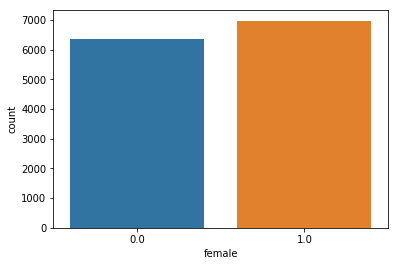

In [44]:
sns.countplot(data['female'])
plt.show()

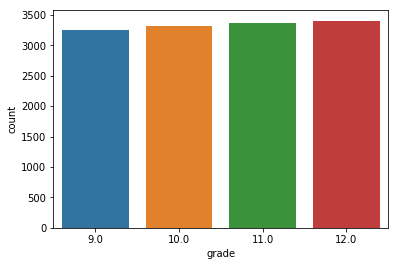

In [45]:
sns.countplot(data['grade'])
plt.show()

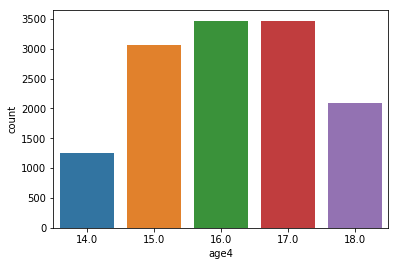

In [46]:
sns.countplot(data['age4'])
plt.show()

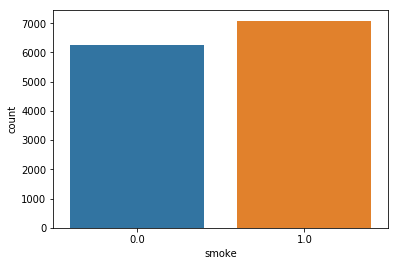

In [47]:
sns.countplot(data['smoke'])
plt.show()

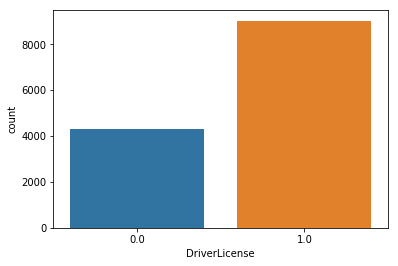

In [48]:
sns.countplot(data['DriverLicense'])
plt.show()

### b. Apply correlation plot and display with color code and numerical indication

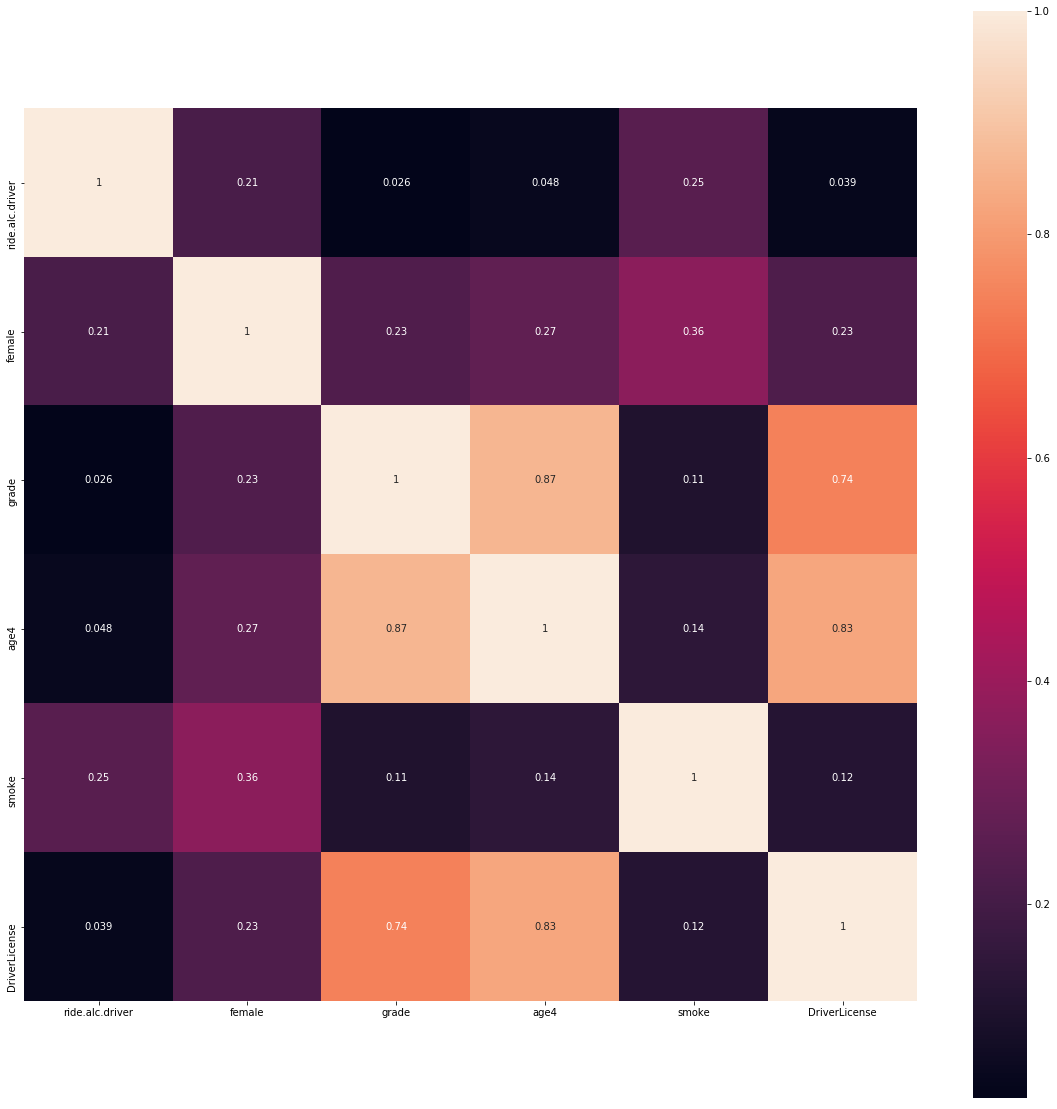

In [49]:
plt.figure(figsize=(20,20)) 
sns.heatmap(data.corr(), annot=True,square=True)  

### c. Plot best X with Y and find how the Y is varying with X.
     Like if X is continuous, go for scatter plot.
     if X is categorical, go for box plot.


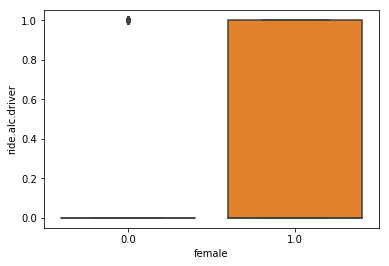

In [50]:
sns.boxplot(x=data['female'],y=data['ride.alc.driver'])
plt.show()

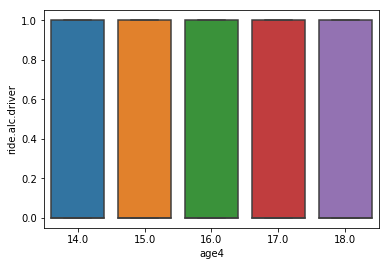

In [51]:
sns.boxplot(x=data['age4'],y=data['ride.alc.driver'])
plt.show()

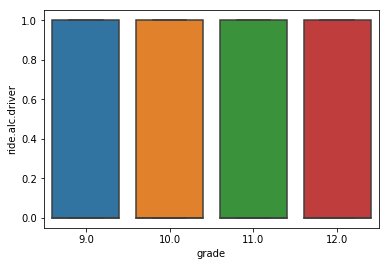

In [52]:
sns.boxplot(x=data['grade'],y=data['ride.alc.driver'])
plt.show()

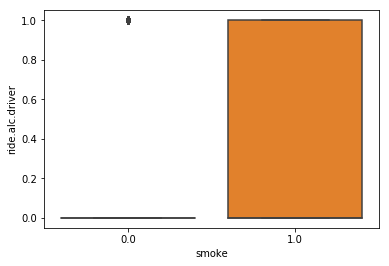

In [53]:
sns.boxplot(x=data['smoke'],y=data['ride.alc.driver'])
plt.show()

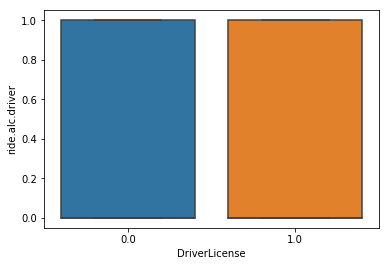

In [54]:
sns.boxplot(x=data['DriverLicense'],y=data['ride.alc.driver'])
plt.show()

### d.Apply density plot and check if the data is normally distributed

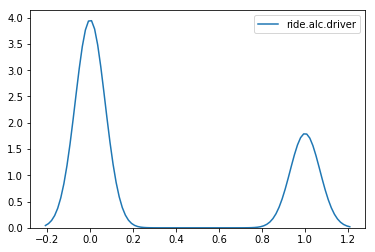

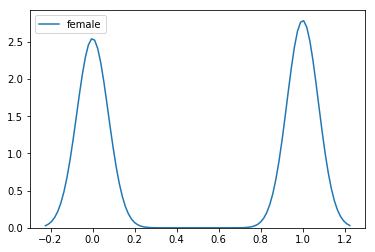

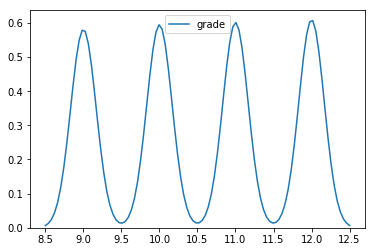

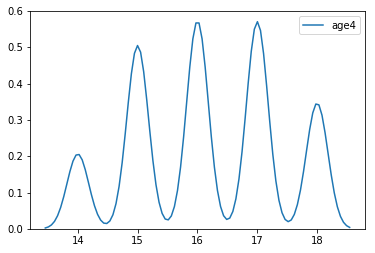

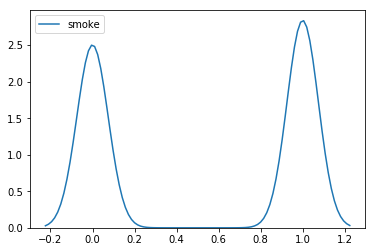

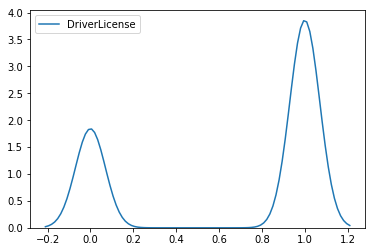

In [55]:
data_num = data.columns
for col in data_num:
    sns.kdeplot(data[col])
    plt.show()

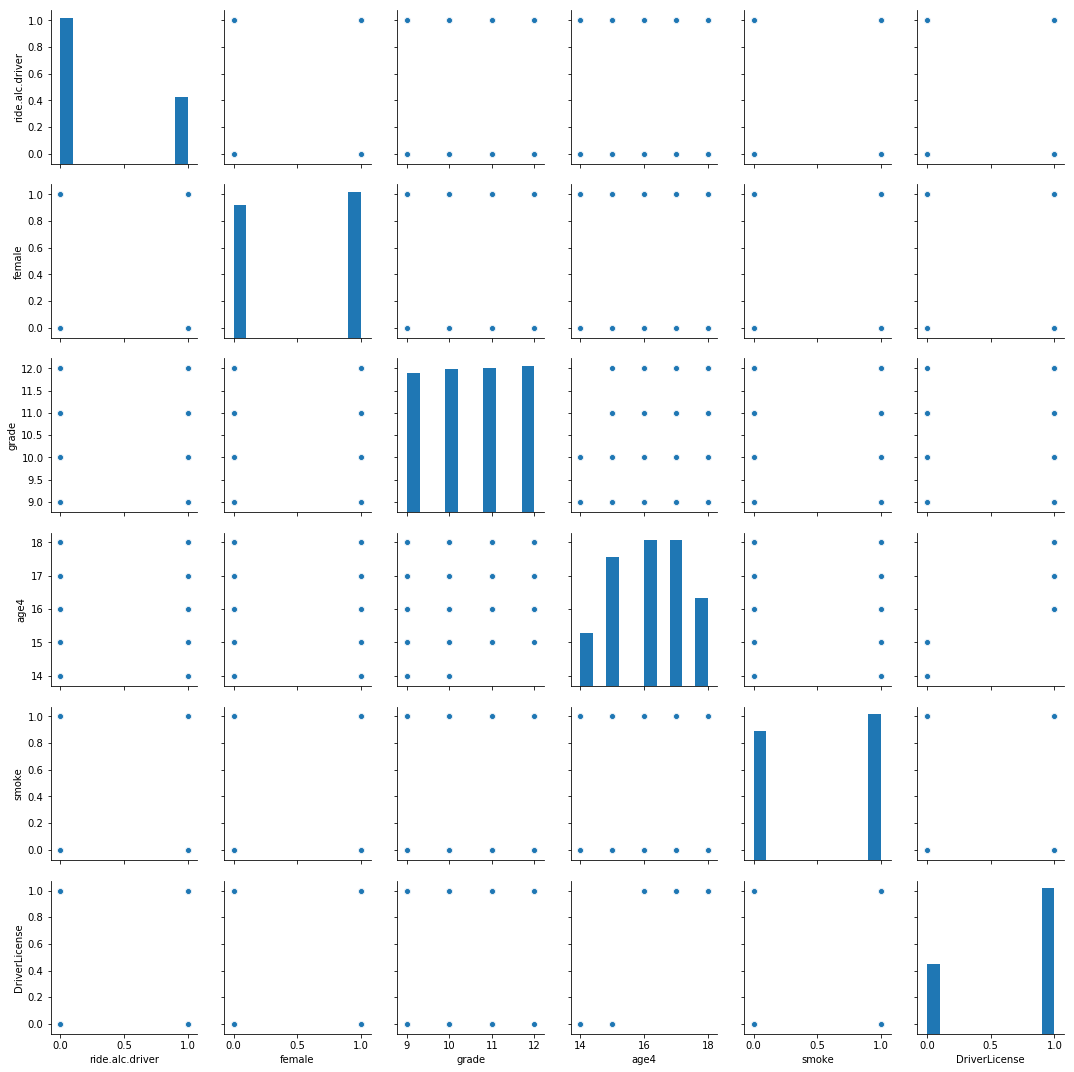

In [89]:
sns.pairplot(data)
plt.show()

# EDA-Inference

1. From first plot the boxplot the inferences i have consider are as most of the columns are categorical, the data distributed evenly and there re no outliers.
2. The correlation matrics graph tells us that age4 is higly correlated with driver license as 18 above only get the driver license.
3. Even the age and the grade are correlate because we the education depends on the age like 15 years the person will in 10th grade and so on.
4. As both age and grade and age and driver license are correlated even the grade and driver license are correlated.
5. I have tried box plot with respect to target variable ride.alc.driver which tells us wheather the person drank and rode the bike in last 30 days or not with all the remaining predictor variables, even their the boxplot repreent a bar plot as most of the data lies in categorical form.
6. When coming to the density plot, as our data is categorical the output will be like the number of values is equal to number of peaks, clearly we can see 2 to 4 peaks in our data columns.

## Data Handling

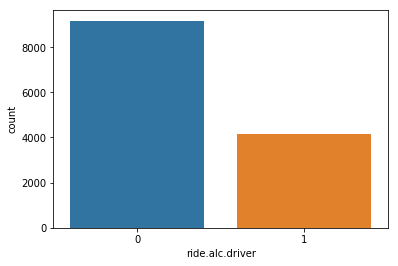

In [56]:
sns.countplot(data['ride.alc.driver'])
plt.show()

In [57]:
outcome0 = len(data[data['ride.alc.driver'] == 0])
outcome1 = len(data[data['ride.alc.driver'] == 1])
total = outcome0 + outcome1

p_outcome0 = (outcome0 / total) * 100
p_outcome1 = (outcome1 / total) * 100

print(p_outcome0)
print(p_outcome1)

68.8020403570625
31.197959642937512


The target variable undergone with under sampling so let us try different sampling techniques like undersample, oversample and smote.

### Undersampling

(13331, 5)
(8318, 5)


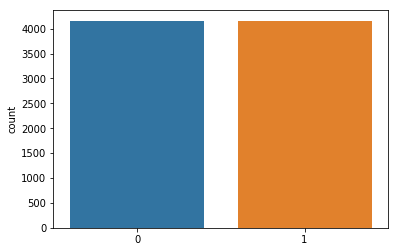

In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)

X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

# Revert resampeled data into a dataframe
X_resampled = pd.DataFrame(X_resampled,index=idx_resampled,columns=X.columns)

print(X.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.show()

### Oversampling

(13331, 5)
(18344, 5)


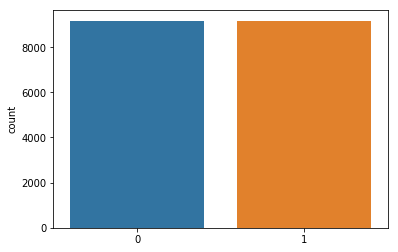

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_resampled, y_resampled = ros.fit_sample(X, y)

# Revert resampeled data into a dataframe
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

print(X.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.show()

### SMOTE

(13331, 5)
(18344, 5)


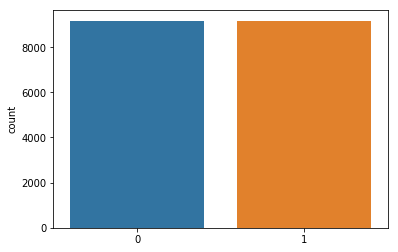

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_resampled, y_resampled = sm.fit_sample(X, y)

# Revert resampeled data into a dataframe
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

print(X.shape)
print(X_resampled.shape)

sns.countplot(y_resampled)
plt.show()

## Feature Selection

In [61]:
from sklearn.feature_selection import SelectFromModel, RFE

In [62]:
estimator = LogisticRegression()
featureSelection = SelectFromModel(estimator, max_features=4)
featureSelection.fit(X, y)

selectedFeatures = featureSelection.transform(X)
X.columns[featureSelection.get_support()]

Index(['female', 'smoke'], dtype='object')

In [63]:
estimator = LogisticRegression()
rfe = RFE(estimator, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X.columns[fit.get_support()]

Num Features: 4
Selected Features: [ True  True  True  True False]
Feature Ranking: [1 1 1 1 2]


Index(['female', 'grade', 'age4', 'smoke'], dtype='object')

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
estimator = LogisticRegression()

sfs1 = SFS(estimator, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5)

sfs1 = sfs1.fit(X, y)
list(sfs1.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished

[2019-10-31 16:28:56] Features: 1/4 -- score: 0.6333156388839067[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished

[2019-10-31 16:28:56] Features: 2/4 -- score: 0.6678401077494927[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished

[2019-10-31 16:28:57] Features: 3/4 -- score: 0.671808717012061[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

['female', 'grade', 'age4', 'smoke']

In [65]:
sfs2 = SFS(estimator, 
           k_features=4, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='f1',
           cv=5)

sfs2 = sfs2.fit(X, y)
list(sfs2.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished

[2019-10-31 16:28:58] Features: 4/4 -- score: 0.08927632888604783

['female', 'grade', 'age4', 'smoke']

In al the cases the best feature are female which says the gender, grade which tells which standard the person in, age4 which is highly correlated with grade and mainly says wheather the person eligible to drive or not and smoke, most of the people drinks also smokes.

## Classification

In [66]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(Xtrain, ytrain)

print('Training score =', logreg_model.score(Xtrain, ytrain))
print('Test score =', logreg_model.score(Xtest, ytest))

Training score = 0.6887793376915657
Test score = 0.685


In [68]:
m2_train = 0.688
m2_test = 0.685

### Decision Trees

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

print('Training score =', dt.score(Xtrain, ytrain))
print('Test score =', dt.score(Xtest, ytest))

Training score = 0.6921015968277784
Test score = 0.67775


In [70]:
m3_train = 0.692
m3_test = 0.677

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

print('Training score =', knn.score(Xtrain, ytrain))
print('Test score =', knn.score(Xtest, ytest))

Training score = 0.6385167720501554
Test score = 0.60675


In [72]:
m4_train = 0.638
m4_test = 0.606

### Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain, ytrain)

print('Training score =', nb.score(Xtrain, ytrain))
print('Test score =', nb.score(Xtest, ytest))

Training score = 0.6732397385060551
Test score = 0.65775


In [74]:
m5_train = 0.673
m5_test = 0.657

## Ensemble

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

print('Training score =', rf.score(Xtrain, ytrain))
print('Test score =', rf.score(Xtest, ytest))

Training score = 0.6913514092808917
Test score = 0.671


In [76]:
m6_train = 0.691
m6_test = 0.671

### Bagging

In [77]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(random_state=1))
bag.fit(Xtrain,ytrain)

print('Training score =', bag.score(Xtrain, ytrain))
print('Test score =', bag.score(Xtest, ytest))

Training score = 0.6919944271782231
Test score = 0.6775


In [78]:
m7_train = 0.691
m7_test = 0.677

### Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(Xtrain,ytrain)

print('Training score =', gb.score(Xtrain, ytrain))
print('Test score =', gb.score(Xtest, ytest))

Training score = 0.6909227306826706
Test score = 0.684


In [80]:
m8_train = 0.690
m8_test = 0.684

                              Train Score  Test Score
Logistic Regression 1               0.688       0.685
Decision Tree                       0.688       0.685
Knn                                 0.692       0.677
Bayesian Regression                 0.638       0.606
Navie Bayes                         0.673       0.657
Random Forest Classifier            0.691       0.671
Bagging Classifier                  0.691       0.677
Gradient Boosting Classifier        0.690       0.684


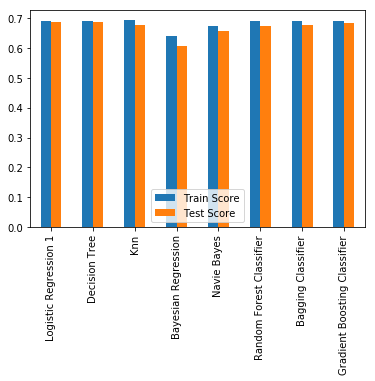

In [81]:
train_score=[m1_train,m2_train,m3_train,m4_train,m5_train,m6_train,m7_train,m8_train]
test_score=[m1_test,m2_test,m3_test,m4_test,m5_test,m6_test,m7_test,m8_test]
col={'Train Score':train_score,'Test Score':test_score}
models=['Logistic Regression 1','Decision Tree','Knn','Bayesian Regression','Navie Bayes','Random Forest Classifier','Bagging Classifier','Gradient Boosting Classifier']
df=pd.DataFrame(data=col,index=models)
print(df)

df.plot(kind='bar')
plt.show()

In [85]:
df

,Train Score,Test Score
Logistic Regression 1,0.688,0.685
Decision Tree,0.688,0.685
Knn,0.692,0.677
Bayesian Regression,0.638,0.606
Navie Bayes,0.673,0.657
Random Forest Classifier,0.691,0.671
Bagging Classifier,0.691,0.677
Gradient Boosting Classifier,0.690,0.684


# ROC

In [82]:
from sklearn.metrics import auc

In [83]:
MLA = [BaggingClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),LogisticRegression()]


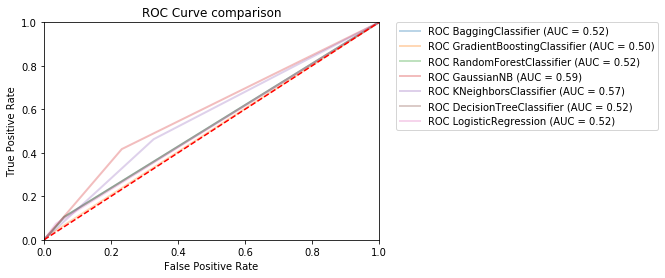

In [84]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(Xtrain, ytrain).predict(Xtest)
    fp, tp, th = roc_curve(ytest, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()